<a href="https://colab.research.google.com/github/xRomory/CCADMACL_EXERCISES_COM231ML/blob/main/exercise_2b/DeVera_Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**

Dataset feature description

    * child mort - Death of children under 5 years of age per 1000 live births

    * exports - Exports of goods and services per capita. Given as %age of the GDP per capita

    * health - Total health spending per capita. Given as %age of GDP per capita

    * import - Imports of goods and services per capita. Given as %age of the GDP per capita

    * income - Net income per person

    * inflation - The measurement of the annual growth rate of the Total GDP

    * life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same

    * total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.

    * gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.
  



In [29]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [19]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [20]:
df.shape

# There are 167 rowws and 10 features in this dataset

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [21]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [22]:
df.isna().sum()


,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [23]:
df_num_feature = df.select_dtypes(include=np.number)
df_num_feature.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [27]:
df_num_feature_scaled = StandardScaler().fit_transform(df_num_feature)
df_num_feature_scaled = pd.DataFrame(df_num_feature_scaled, columns=df_num_feature.columns)
df_num_feature_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

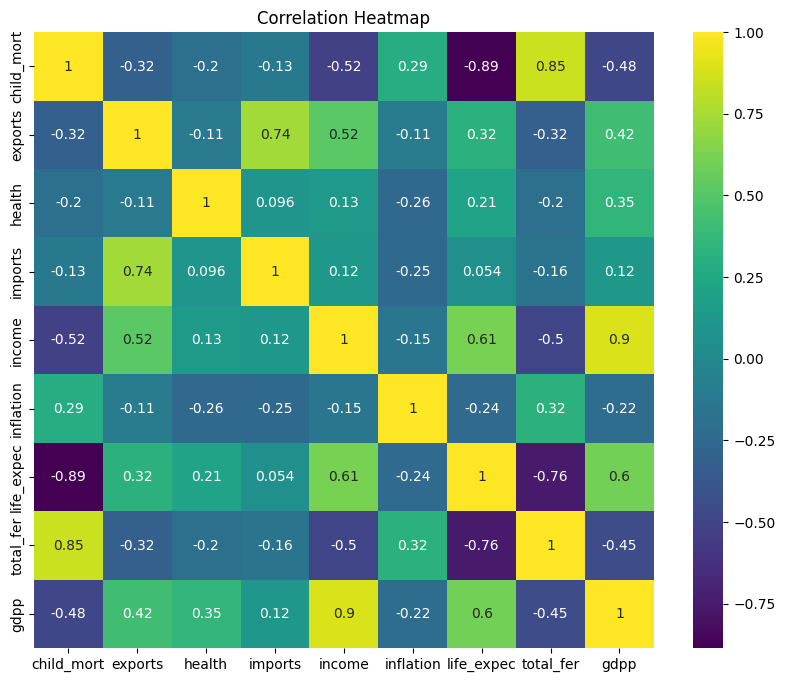

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_num_feature_scaled.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

The variables that appears to have strong correlations are:

* Negative Correlation: Life expectation and Child Mortgage

* Positive Correlation: Income and GDP per Capita



In [36]:
import plotly.express as px

x = "child_mort"
y = "income"
z = "gdpp"

variables = df_num_feature_scaled[[x, y, z]]
fig = px.scatter_3d(variables, x=x, y=y, z=z, opacity=0.7)
fig.show()


In [38]:
# 2D Scatter
fig_2d = px.scatter(variables, x=x, y=z, opacity=0.7)
fig_2d.show()

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

Text(0, 0.5, 'Distance')

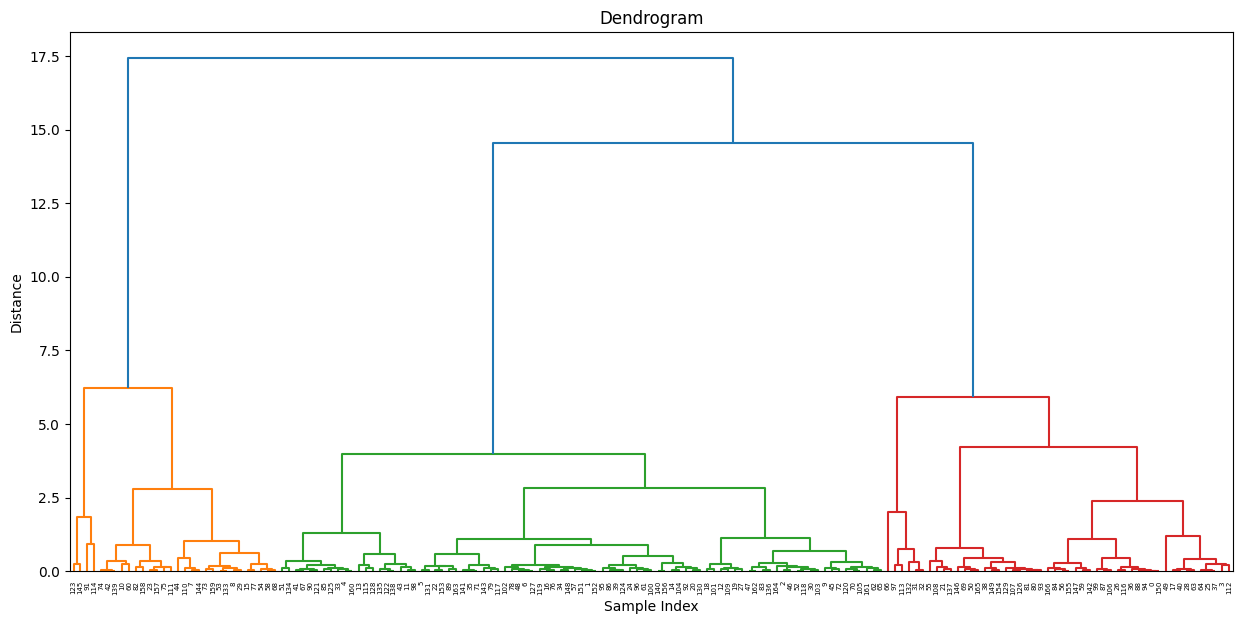

In [47]:
data = df_num_feature_scaled[["child_mort", "gdpp"]]
den_linkage = linkage(data, "ward")
plt.figure(figsize=(15, 7))
dendrogram(den_linkage)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
# plt.show()

In [48]:
# For experiment purposes

# den_linkage = linkage(data, "complete")
# plt.figure(figsize=(15, 7))
# dendrogram(den_linkage)
# plt.title("Dendrogram")
# plt.xlabel("Sample Index")
# plt.ylabel("Distance")
# plt.show()

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

In [ ]:
# put your answer here

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [ ]:
# put your answer here

## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

In [ ]:
# put your answer here

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

*Write you answer here*

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


_Write your reflection here._